In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spectral import *
from scipy import linalg
import scipy.stats as stats
import pandas as pd
import tkinter as tk
import glob
import os
import cv2

In [2]:
class DataProcessor:
    def __init__(self, leuko_data_dir, leuko_masks_dir, leuko_rgbs_dir, scc_data_dir, scc_masks_dir, scc_rgbs_dir, osmf_data_dir, osmf_masks_dir, osmf_rgbs_dir,
                 dh_leuko_data_dir, dh_leuko_masks_dir, dh_leuko_rgbs_dir, dh_scc_data_dir, dh_scc_masks_dir, dh_scc_rgbs_dir, dh_osmf_data_dir, dh_osmf_masks_dir, dh_osmf_rgbs_dir,
                 hh_data_dir, hh_masks_dir, hh_rgbs_dir):
                  
        # Leuko Data
        self.leuko_data_dir = leuko_data_dir
        self.leuko_masks_dir = leuko_masks_dir
        self.leuko_rgbs_dir = leuko_rgbs_dir

        # SCC Data
        self.scc_data_dir = scc_data_dir
        self.scc_masks_dir = scc_masks_dir
        self.scc_rgbs_dir = scc_rgbs_dir

        # OSMF Data
        self.osmf_data_dir = osmf_data_dir
        self.osmf_masks_dir = osmf_masks_dir
        self.osmf_rgbs_dir = osmf_rgbs_dir

        # Disease Healthy - Leuko
        self.dh_leuko_data_dir= dh_leuko_data_dir
        self.dh_leuko_masks_dir = dh_leuko_masks_dir
        self.dh_leuko_rgbs_dir= dh_leuko_rgbs_dir

        #Disease Healthy - SCC
        self.dh_scc_data_dir= dh_scc_data_dir
        self.dh_scc_masks_dir = dh_scc_masks_dir
        self.dh_scc_rgbs_dir= dh_scc_rgbs_dir
        
        #Disease Healthy - OSMF
        self.dh_osmf_data_dir= dh_osmf_data_dir
        self.dh_osmf_masks_dir = dh_osmf_masks_dir
        self.dh_osmf_rgbs_dir= dh_osmf_rgbs_dir

        # Healthy Data
        self.hh_data_dir = hh_data_dir
        self.hh_masks_dir = hh_masks_dir
        self.hh_rgbs_dir = hh_rgbs_dir

        self.leuko_imgs = []
        self.leuko_masks = []
        self.leuko_rgbs = []
        self.leuko_data_name = []
        self.leuko_masks_name = []
        self.leuko_rgbs_name = []

        self.scc_imgs = []
        self.scc_masks = []
        self.scc_rgbs = []
        self.scc_data_name = []
        self.scc_masks_name = []
        self.scc_rgbs_name = []

        self.osmf_imgs = []
        self.osmf_masks = []
        self.osmf_rgbs = []
        self.osmf_data_name = []
        self.osmf_masks_name = []
        self.osmf_rgbs_name = []

        self.dh_leuko_imgs = []
        self.dh_leuko_masks = []
        self.dh_leuko_rgbs = []    
        self.dh_leuko_data_name = []
        self.dh_leuko_masks_name = []
        self.dh_leuko_rgbs_name = []

        self.dh_scc_imgs = []
        self.dh_scc_masks = []
        self.dh_scc_rgbs = [] 
        self.dh_scc_data_name = []
        self.dh_scc_masks_name = []
        self.dh_scc_rgbs_name = []

        self.dh_osmf_imgs = []
        self.dh_osmf_masks = []
        self.dh_osmf_rgbs = []        
        self.dh_osmf_data_name = []
        self.dh_osmf_masks_name = []
        self.dh_osmf_rgbs_name = []

        self.hh_imgs = []
        self.hh_masks = []
        self.hh_rgbs = []
        self.hh_data_name = []
        self.hh_masks_name = []
        self.hh_rgbs_name = []

    def load_multispectral_data(self, data_dir, imgs_list, data_name):
        # msi_files = data_dir 
        msi_files = glob.glob(os.path.join(data_dir))
        for msi_file in msi_files:
            img_data = open_image(msi_file)
            imgs_list.append(np.asarray(img_data.load()))
            img_filename = os.path.basename(msi_file)
            data_name.append(img_filename)

    def load_masks(self, masks_dir, masks_list, masks_name):
        # mask_files = masks_dir
        mask_files = glob.glob(os.path.join(masks_dir))
        for mask_file in mask_files:
            mask_data = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
            _, mask_data = cv2.threshold(mask_data, 0, 1, cv2.THRESH_BINARY)
            masks_list.append(mask_data)
            mask_filename = os.path.basename(mask_file)
            masks_name.append(mask_filename)

    def load_rgbs(self, rgbs_dir, rgbs_list, rgbs_name):
        # rgb_files = rgbs_dir
        rgb_files = glob.glob(os.path.join(rgbs_dir))
        for rgb_file in rgb_files:
            rgb_im = cv2.imread(rgb_file)
            rgb_im = cv2.cvtColor(rgb_im, cv2.COLOR_BGR2RGB)
            rgbs_list.append(rgb_im)
            rgb_filename = os.path.basename(rgb_file)
            rgbs_name.append(rgb_filename)

    def process_data(self):
        self.load_multispectral_data(self.leuko_data_dir, self.leuko_imgs, self.leuko_data_name)
        self.load_masks(self.leuko_masks_dir, self.leuko_masks, self.leuko_masks_name)
        self.load_rgbs(self.leuko_rgbs_dir, self.leuko_rgbs, self.leuko_rgbs_name)

        self.load_multispectral_data(self.scc_data_dir, self.scc_imgs, self.scc_data_name)
        self.load_masks(self.scc_masks_dir, self.scc_masks, self.scc_masks_name)
        self.load_rgbs(self.scc_rgbs_dir, self.scc_rgbs, self.scc_rgbs_name)

        self.load_multispectral_data(self.osmf_data_dir, self.osmf_imgs, self.osmf_data_name)
        self.load_masks(self.osmf_masks_dir, self.osmf_masks, self.osmf_masks_name)
        self.load_rgbs(self.osmf_rgbs_dir, self.osmf_rgbs, self.osmf_rgbs_name)

        self.load_multispectral_data(self.dh_leuko_data_dir, self.dh_leuko_imgs, self.dh_leuko_data_name)
        self.load_masks(self.dh_leuko_masks_dir, self.dh_leuko_masks, self.dh_leuko_masks_name)
        self.load_rgbs(self.dh_leuko_rgbs_dir, self.dh_leuko_rgbs, self.dh_leuko_rgbs_name)

        self.load_multispectral_data(self.dh_scc_data_dir, self.dh_scc_imgs, self.dh_scc_data_name)
        self.load_masks(self.dh_scc_masks_dir, self.dh_scc_masks, self.dh_scc_masks_name)
        self.load_rgbs(self.dh_scc_rgbs_dir, self.dh_scc_rgbs, self.dh_scc_rgbs_name)

        self.load_multispectral_data(self.dh_osmf_data_dir, self.dh_osmf_imgs, self.dh_osmf_data_name)
        self.load_masks(self.dh_osmf_masks_dir, self.dh_osmf_masks, self.dh_osmf_masks_name)
        self.load_rgbs(self.dh_osmf_rgbs_dir, self.dh_osmf_rgbs, self.dh_osmf_rgbs_name)

        self.load_multispectral_data(self.hh_data_dir, self.hh_imgs, self.hh_data_name)
        self.load_masks(self.hh_masks_dir, self.hh_masks, self.hh_masks_name)
        self.load_rgbs(self.hh_rgbs_dir, self.hh_rgbs, self.hh_rgbs_name)


In [3]:
# Create an instance of the DataProcessor class and process the data
base_dir = "C:/Users/htic/Documents/Jupyter/MSI_Oral_Analysis/"
data_processor = DataProcessor(
    
    # Read Leuko data
    leuko_data_dir = os.path.join(base_dir, "UH/class/leuko/data/*.hdr"), 
    leuko_masks_dir = os.path.join(base_dir, "UH/class/leuko/masked/*.png"),
    leuko_rgbs_dir = os.path.join(base_dir, "UH/class/leuko/rgb/*.png"),

    # Read OSCC data
    scc_data_dir = os.path.join(base_dir, "UH/class/oscc/data/*.hdr"),
    scc_masks_dir = os.path.join(base_dir, "UH/class/oscc/masked/*.png"),
    scc_rgbs_dir = os.path.join(base_dir, "UH/class/oscc/rgb/*.png"),

    # Read OSMF data
    osmf_data_dir = os.path.join(base_dir, "UH/class/osmf/data/*.hdr"),
    osmf_masks_dir = os.path.join(base_dir, "UH/class/osmf/masked/*.png"),
    osmf_rgbs_dir = os.path.join(base_dir, "UH/class/osmf/rgb/*.png"),

    # Read DH-Leuko data
    dh_leuko_data_dir = os.path.join(base_dir, "DH/DH/leuko/data/*.hdr"),
    dh_leuko_masks_dir = os.path.join(base_dir, "DH/DH/leuko/masked/*.png"),
    dh_leuko_rgbs_dir = os.path.join(base_dir, "DH/DH/leuko/rgb/*.png"),

    # Read DH-OSCC data
    dh_scc_data_dir = os.path.join(base_dir, "DH/DH/oscc/data/*.hdr"),
    dh_scc_masks_dir = os.path.join(base_dir, "DH/DH/oscc/masked/*.png"),
    dh_scc_rgbs_dir = os.path.join(base_dir, "DH/DH/oscc/rgb/*.png"),

    # Read DH-OSMF data
    dh_osmf_data_dir = os.path.join(base_dir, "DH/DH/osmf/data/*.hdr"),
    dh_osmf_masks_dir = os.path.join(base_dir, "DH/DH/osmf/masked/*.png"),
    dh_osmf_rgbs_dir = os.path.join(base_dir, "DH/DH/osmf/rgb/*.png"),

    # Read Healthy data
    hh_data_dir = os.path.join(base_dir, "HH/HH/data/*.hdr"),
    hh_masks_dir = os.path.join(base_dir, "HH/HH/masked/*.png"),
    hh_rgbs_dir = os.path.join(base_dir, "HH/HH/rgbs/*.png"),
)
data_processor.process_data()


In [4]:
# To verify with the excel if all the respective data are read - Leuko
print(f"Leuko Data - {len(data_processor.leuko_data_name)}")
for i in range(len(data_processor.leuko_data_name)):
    # print(len(data_processor.leuko_data_name))
    print(f"{i}. Data = {data_processor.leuko_data_name[i]}, Mask = {data_processor.leuko_masks_name[i]}, RGB = {data_processor.leuko_rgbs_name[i]}")

Leuko Data - 54
0. Data = task-104.hdr, Mask = task-104.png, RGB = task-104.png
1. Data = task-105.hdr, Mask = task-105.png, RGB = task-105.png
2. Data = task-110.hdr, Mask = task-110.png, RGB = task-110.png
3. Data = task-113.hdr, Mask = task-113.png, RGB = task-113.png
4. Data = task-117.hdr, Mask = task-117.png, RGB = task-117.png
5. Data = task-120.hdr, Mask = task-120.png, RGB = task-120.png
6. Data = task-121.hdr, Mask = task-121.png, RGB = task-121.png
7. Data = task-124.hdr, Mask = task-124.png, RGB = task-124.png
8. Data = task-125.hdr, Mask = task-125.png, RGB = task-125.png
9. Data = task-127.hdr, Mask = task-127.png, RGB = task-127.png
10. Data = task-128.hdr, Mask = task-128.png, RGB = task-128.png
11. Data = task-129.hdr, Mask = task-129.png, RGB = task-129.png
12. Data = task-133.hdr, Mask = task-133.png, RGB = task-133.png
13. Data = task-144.hdr, Mask = task-144.png, RGB = task-144.png
14. Data = task-145.hdr, Mask = task-145.png, RGB = task-145.png
15. Data = task-147

In [5]:
# To verify with the excel if all the respective data are read - OSCC
print(f"SCC Data - {len(data_processor.scc_data_name)}")
for i in range(len(data_processor.scc_data_name)):
    print(f"{i}. Data = {data_processor.scc_data_name[i]}, Mask = {data_processor.scc_masks_name[i]}, RGB = {data_processor.scc_rgbs_name[i]}")

SCC Data - 21
0. Data = task-115.hdr, Mask = task-115.png, RGB = task-115.png
1. Data = task-116.hdr, Mask = task-116.png, RGB = task-116.png
2. Data = task-12.hdr, Mask = task-12.png, RGB = task-12.png
3. Data = task-14.hdr, Mask = task-14.png, RGB = task-14.png
4. Data = task-15.hdr, Mask = task-15.png, RGB = task-15.png
5. Data = task-16.hdr, Mask = task-16.png, RGB = task-16.png
6. Data = task-163.hdr, Mask = task-163.png, RGB = task-163.png
7. Data = task-168.hdr, Mask = task-168.png, RGB = task-168.png
8. Data = task-17.hdr, Mask = task-17.png, RGB = task-17.png
9. Data = task-18.hdr, Mask = task-18.png, RGB = task-18.png
10. Data = task-20.hdr, Mask = task-20.png, RGB = task-20.png
11. Data = task-21.hdr, Mask = task-21.png, RGB = task-21.png
12. Data = task-22.hdr, Mask = task-22.png, RGB = task-22.png
13. Data = task-23.hdr, Mask = task-23.png, RGB = task-23.png
14. Data = task-26.hdr, Mask = task-26.png, RGB = task-26.png
15. Data = task-27.hdr, Mask = task-27.png, RGB = task

In [6]:
# To verify with the excel if all the respective data are read - DH-Leuko
print(f"Disease-healthy Data - {len(data_processor.dh_leuko_data_name)}")
for i in range(len(data_processor.dh_leuko_data_name)):
    print(f"{i}. Data = {data_processor.dh_leuko_data_name[i]}, Mask = {data_processor.dh_leuko_data_name[i]}, RGB = {data_processor.dh_leuko_data_name[i]}")

Disease-healthy Data - 20
0. Data = task-111.hdr, Mask = task-111.hdr, RGB = task-111.hdr
1. Data = task-112.hdr, Mask = task-112.hdr, RGB = task-112.hdr
2. Data = task-118.hdr, Mask = task-118.hdr, RGB = task-118.hdr
3. Data = task-119.hdr, Mask = task-119.hdr, RGB = task-119.hdr
4. Data = task-123.hdr, Mask = task-123.hdr, RGB = task-123.hdr
5. Data = task-126.hdr, Mask = task-126.hdr, RGB = task-126.hdr
6. Data = task-152.hdr, Mask = task-152.hdr, RGB = task-152.hdr
7. Data = task-157.hdr, Mask = task-157.hdr, RGB = task-157.hdr
8. Data = task-162.hdr, Mask = task-162.hdr, RGB = task-162.hdr
9. Data = task-167.hdr, Mask = task-167.hdr, RGB = task-167.hdr
10. Data = task-171.hdr, Mask = task-171.hdr, RGB = task-171.hdr
11. Data = task-177.hdr, Mask = task-177.hdr, RGB = task-177.hdr
12. Data = task-179.hdr, Mask = task-179.hdr, RGB = task-179.hdr
13. Data = task-180.hdr, Mask = task-180.hdr, RGB = task-180.hdr
14. Data = task-183.hdr, Mask = task-183.hdr, RGB = task-183.hdr
15. Data 

In [7]:
# To verify with the excel if all the respective data are read - DH-OSCC
print(f"Disease-healthy Data - {len(data_processor.dh_scc_data_name)}")
for i in range(len(data_processor.dh_scc_data_name)):
    print(f"{i}. Data = {data_processor.dh_scc_data_name[i]}, Mask = {data_processor.dh_scc_data_name[i]}, RGB = {data_processor.dh_scc_data_name[i]}")

Disease-healthy Data - 6
0. Data = task-13.hdr, Mask = task-13.hdr, RGB = task-13.hdr
1. Data = task-19.hdr, Mask = task-19.hdr, RGB = task-19.hdr
2. Data = task-32.hdr, Mask = task-32.hdr, RGB = task-32.hdr
3. Data = task-44.hdr, Mask = task-44.hdr, RGB = task-44.hdr
4. Data = task-45.hdr, Mask = task-45.hdr, RGB = task-45.hdr
5. Data = task-46.hdr, Mask = task-46.hdr, RGB = task-46.hdr


In [8]:
# To verify with the excel if all the respective data are read  - HH
print(f"\nHealthy Data - {len(data_processor.hh_data_name)}")
for i in range(len(data_processor.hh_data_name)):
    print(f"{i}. Data = {data_processor.hh_data_name[i]}, Mask = {data_processor.hh_masks_name[i]}, RGB = {data_processor.hh_rgbs_name[i]}")


Healthy Data - 26
0. Data = H001_3.hdr, Mask = M001_3.png, RGB = H001_3.png
1. Data = H002_2.hdr, Mask = M002_2.png, RGB = H002_2.png
2. Data = H002_3.hdr, Mask = M002_3.png, RGB = H002_3.png
3. Data = H003_2.hdr, Mask = M003_2.png, RGB = H003_2.png
4. Data = H003_3.hdr, Mask = M003_3.png, RGB = H003_3.png
5. Data = H004_2.hdr, Mask = M004_2.png, RGB = H004_2.png
6. Data = H004_3.hdr, Mask = M004_3.png, RGB = H004_3.png
7. Data = H005_2.hdr, Mask = M005_2.png, RGB = H005_2.png
8. Data = H005_3.hdr, Mask = M005_3.png, RGB = H005_3.png
9. Data = H006_2.hdr, Mask = M006_2.png, RGB = H006_2.png
10. Data = H006_3.hdr, Mask = M006_3.png, RGB = H006_3.png
11. Data = H007_2.hdr, Mask = M007_2.png, RGB = H007_2.png
12. Data = H007_3.hdr, Mask = M007_3.png, RGB = H007_3.png
13. Data = H008_2.hdr, Mask = M008_2.png, RGB = H008_2.png
14. Data = H008_3.hdr, Mask = M008_3.png, RGB = H008_3.png
15. Data = H009_2.hdr, Mask = M009_2.png, RGB = H009_2.png
16. Data = H009_3.hdr, Mask = M009_3.png, RGB =

In [9]:
leuko_imgs = data_processor.leuko_imgs
leuko_mask = data_processor.leuko_masks
leuko_rgb_imgs = data_processor.leuko_rgbs

scc_imgs = data_processor.scc_imgs
scc_masks = data_processor.scc_masks
scc_rgb_imgs = data_processor.scc_rgbs

dh_leuko_imgs = data_processor.dh_leuko_imgs
dh_leuko_masks = data_processor.dh_leuko_masks
dh_rgb_leuko_imgs = data_processor.dh_leuko_rgbs

dh_scc_imgs = data_processor.dh_scc_imgs
dh_scc_masks = data_processor.dh_scc_masks
dh_rgb_scc_imgs = data_processor.dh_scc_rgbs

hh_imgs = data_processor.hh_imgs
hh_masks = data_processor.hh_masks
hh_rgb_imgs = data_processor.hh_rgbs


In [10]:
percentages = []

In [42]:
i = 18
img = scc_imgs[i]
rgb_img = scc_rgb_imgs[i]
mask = data_processor.scc_masks[i]
name = data_processor.scc_data_name[i]

# To pick points
%matplotlib tk
fig = plt.figure(figsize=(20,30))

ptx = []
pty = []

def onclick(event):
    ix, iy = event.ydata, event.xdata
    ptx.append(ix) #rows
    pty.append(iy) #cols

def on_close(event):
    print('Closed Figure!')

cid = fig.canvas.mpl_connect('button_press_event', onclick)
fig.canvas.mpl_connect('close_event', on_close)
plt.imshow(rgb_img), plt.title('Select the reference region')
plt.show()

print("Points Selected",ptx,pty) 


Points Selected [] []


Closed Figure!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[116, 153] [196, 234]


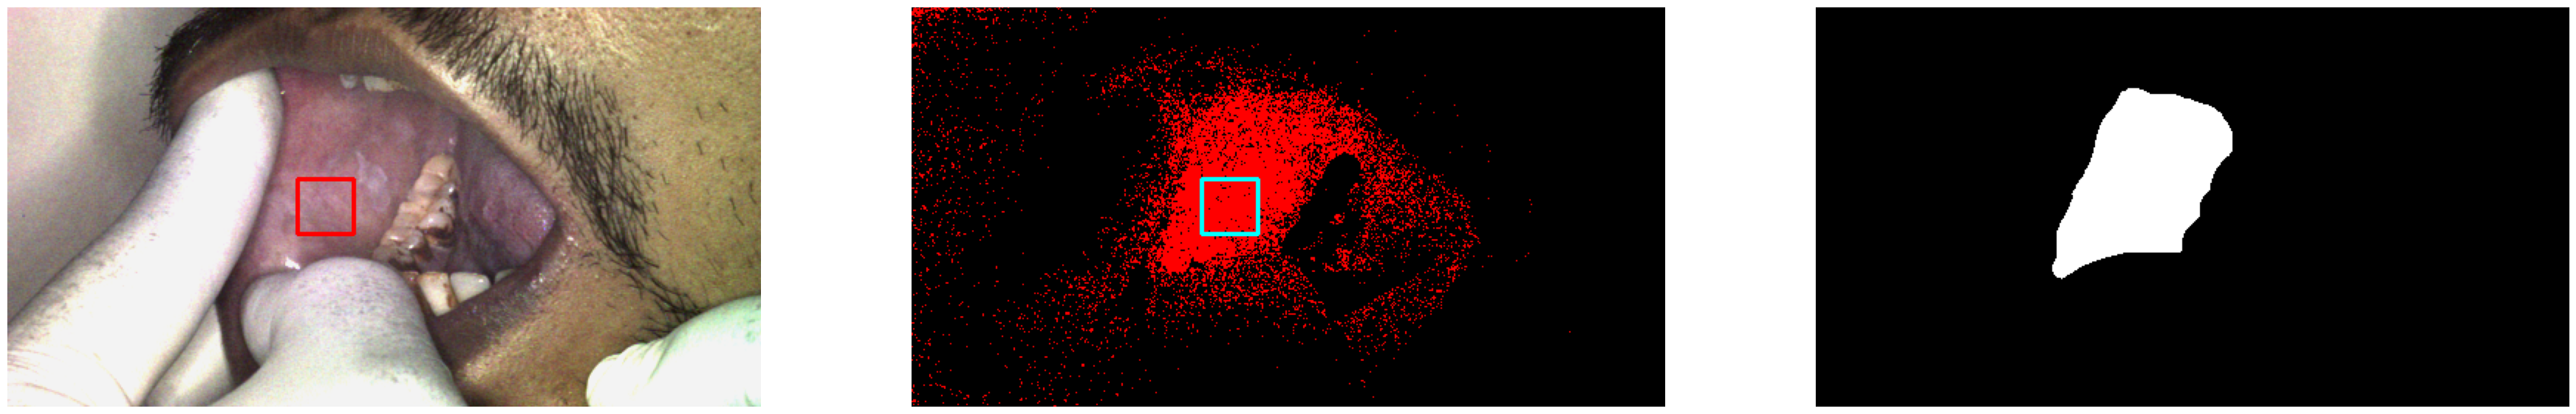

In [43]:
%matplotlib inline
ptx = [int(i) for i in ptx]
pty = [int(i) for i in pty]
print(ptx, pty)

sam_blue = np.zeros((img.shape[0], img.shape[1], 3))

# Reshape img before the loop
img_reshaped = np.reshape(img, (-1, img.shape[2]))

sam_blue_copy = sam_blue.copy()
rgb_img_copy = rgb_img.copy()
for i in range(0, len(ptx)-1, 2):
    ref_roi_msi = img[ptx[i]:ptx[i+1], pty[i]:pty[i+1], :]
    ref_vector = np.reshape(ref_roi_msi, (-1, ref_roi_msi.shape[2])).mean(axis=0)

    cos_angles = np.dot(img_reshaped, ref_vector) / (np.linalg.norm(img_reshaped, axis=1) * np.linalg.norm(ref_vector))
    angles = np.arccos(cos_angles)
    angles_deg = np.degrees(angles)
    sam = np.reshape((angles_deg < 3.75) * 255, (img.shape[0], img.shape[1]))
    sam_blue [:,:,0] = sam
    sam_blue_copy [:,:,0] = sam

for i in range(0,len(ptx)-1,2):
    x1 = pty[i]
    y1 = ptx[i]
    x2 = pty[i+1]
    y2 = ptx[i+1]
    cv2.rectangle(rgb_img_copy,(x1,y1),(x2,y2),(255,0,0),2)
    cv2.rectangle(sam_blue_copy,(x1,y1),(x2,y2),(0,255,255),2)

# cv2.putText(sam_green, "ROI", (x1, y1-5), )
plt.figure(figsize=(45, 15))
plt.subplot(1,3,1),plt.imshow(rgb_img_copy), plt.axis("off")
plt.subplot(1,3,2),plt.imshow(sam_blue_copy, cmap="gray"), plt.axis("off")
plt.subplot(1,3,3),plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


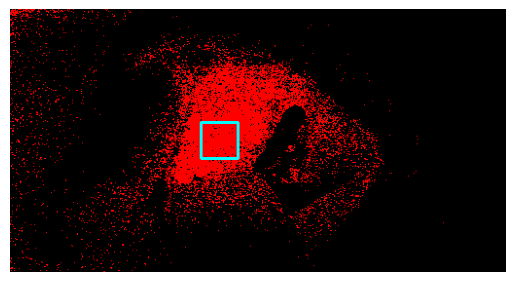

In [44]:
plt.imshow(sam_blue_copy), plt.axis("off")
plt.savefig(f"C:/Users/htic/Desktop/StO2_images/SAM/41/{name}_RedBound.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('Precentage:', 85.17317149733181)

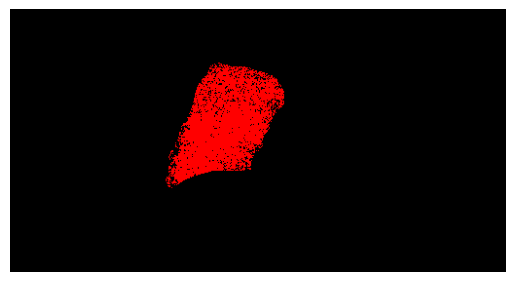

In [45]:
# find percentage of number of pixels that are not 0
sam_masked_region = cv2.bitwise_and(sam_blue, sam_blue, mask=mask)
plt.imshow(sam_masked_region, cmap="gray"), plt.axis("off")
mask_count = (np.count_nonzero(mask))
sam_count = (np.count_nonzero(sam_masked_region))
perc = (sam_count/mask_count) * 100
plt.savefig(f"C:/Users/htic/Desktop/StO2_images/SAM/41/{name}_ROIMAsk.png")
("Precentage:", perc)

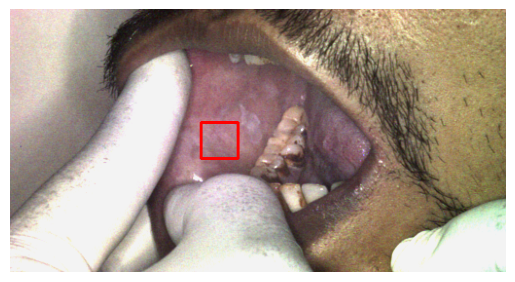

In [46]:
plt.imshow(rgb_img_copy), plt.axis("off")
plt.savefig(f"C:/Users/htic/Desktop/StO2_images/SAM/41/{name}_RGBBound.png")


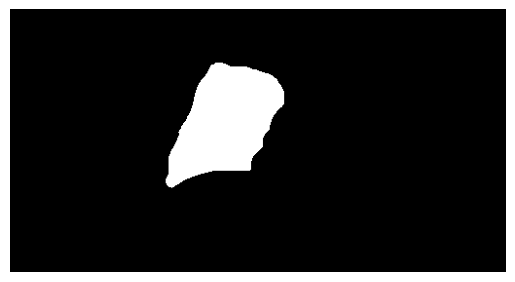

In [47]:
plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.savefig(f"C:/Users/htic/Desktop/StO2_images/SAM/41/{name}_Mask.png")

In [141]:
percentages.append(perc)
print(percentages)
print(np.mean(percentages))

[80.36596431091844, 93.99881164587048, 91.83524694733005, 93.85992217898833, 76.84047095355156, 92.70900982811621, 96.94289445565713, 95.00800969822922, 62.532106803655694, 84.68257682108874]
86.87750136434059


In [ ]:
percs = [x for x in percentages if x > 40]
print(percs)


In [ ]:
print(np.mean(percs))

In [16]:
# i = 3
# img = scc_imgs[i]
# rgb_img = scc_rgb_imgs[i]
# mask = data_processor.scc_masks[i]
# name = data_processor.scc_data_name[i]

# To pick points
%matplotlib tk
fig = plt.figure(figsize=(20,30))

ptx = []
pty = []

def onclick(event):
    ix, iy = event.ydata, event.xdata
    ptx.append(ix) #rows
    pty.append(iy) #cols

def on_close(event):
    print('Closed Figure!')

cid = fig.canvas.mpl_connect('button_press_event', onclick)
fig.canvas.mpl_connect('close_event', on_close)
plt.imshow(rgb_img), plt.title('Select the reference region')
plt.show()

print("Points Selected",ptx,pty) 


Points Selected [] []


Closed Figure!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[170, 198] [269, 299]


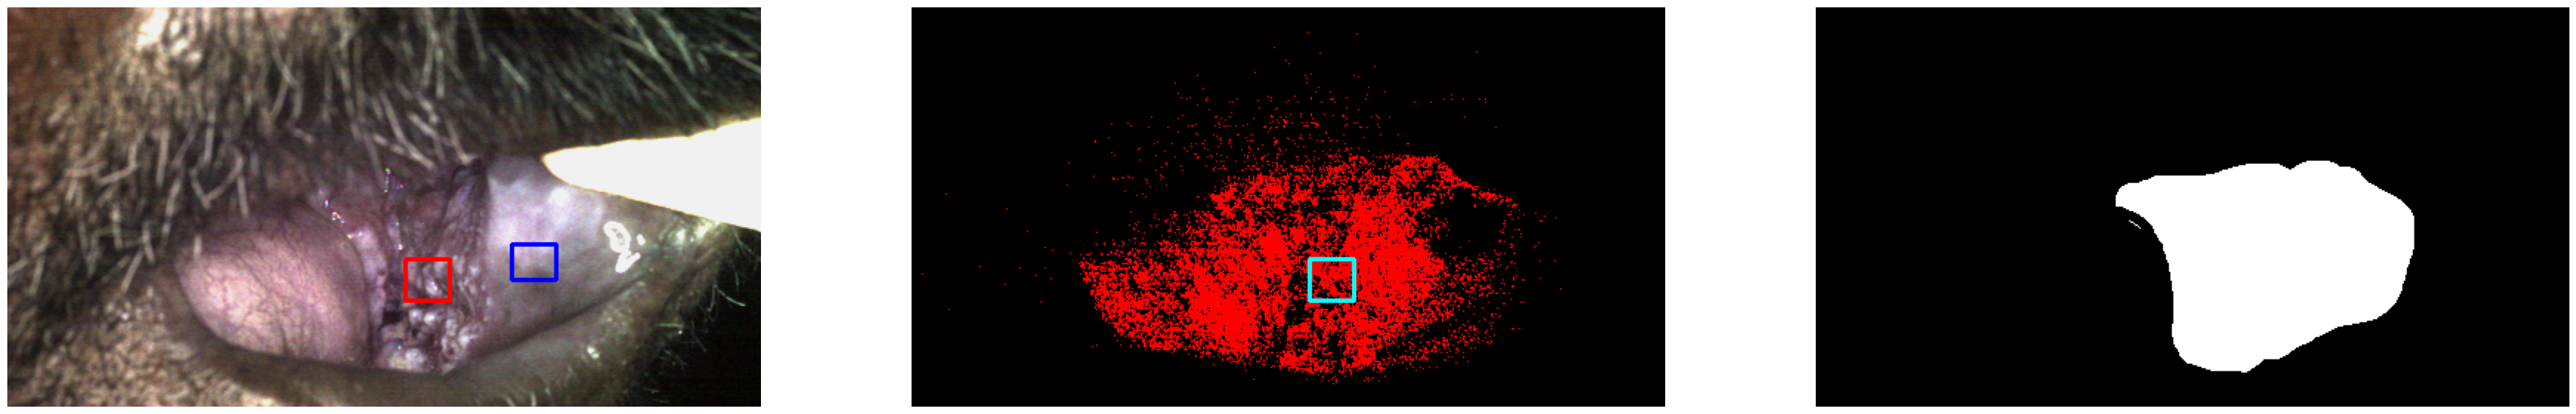

In [151]:
%matplotlib inline
ptx = [int(i) for i in ptx]
pty = [int(i) for i in pty]
print(ptx, pty)

sam_red = np.zeros((img.shape[0], img.shape[1], 3))

# Reshape img before the loop
img_reshaped = np.reshape(img, (-1, img.shape[2]))

sam_red_copy = sam_red.copy() 
# rgb_img_copy = rgb_img.copy()
for i in range(0, len(ptx)-1, 2):
    ref_roi_msi = img[ptx[i]:ptx[i+1], pty[i]:pty[i+1], :]
    ref_vector = np.reshape(ref_roi_msi, (-1, ref_roi_msi.shape[2])).mean(axis=0)

    cos_angles = np.dot(img_reshaped, ref_vector) / (np.linalg.norm(img_reshaped, axis=1) * np.linalg.norm(ref_vector))
    angles = np.arccos(cos_angles)
    angles_deg = np.degrees(angles)
    sam = np.reshape((angles_deg < 3.75) * 255, (img.shape[0], img.shape[1]))
    sam_red[:,:,0] = sam
    sam_red_copy[:,:,0] = sam
    # sam_red = sam_red + sam_rgb

for i in range(0,len(ptx)-1,2):
    x1 = pty[i]
    y1 = ptx[i]
    x2 = pty[i+1]
    y2 = ptx[i+1]
    cv2.rectangle(rgb_img_copy,(x1,y1),(x2,y2),(255,0,0),2)
    cv2.rectangle(sam_red_copy,(x1,y1),(x2,y2),(0,255,255),2)

# cv2.putText(sam_green, "ROI", (x1, y1-5), )
plt.figure(figsize=(45, 15))
plt.subplot(1,3,1),plt.imshow(rgb_img_copy), plt.axis("off")
plt.subplot(1,3,2),plt.imshow(sam_red_copy, cmap="gray"), plt.axis("off")
plt.subplot(1,3,3),plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.savefig(f"C:/Users/htic/Desktop/{name}_SAM.png")
plt.show()

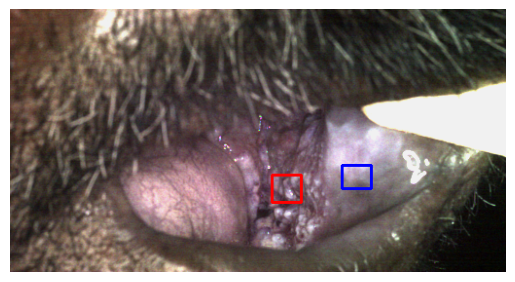

In [153]:
plt.imshow(rgb_img_copy), plt.axis('off')
plt.savefig(f"C:/Users/htic/Desktop/StO2_images/SAM/14/{name}_SAM_RGB.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


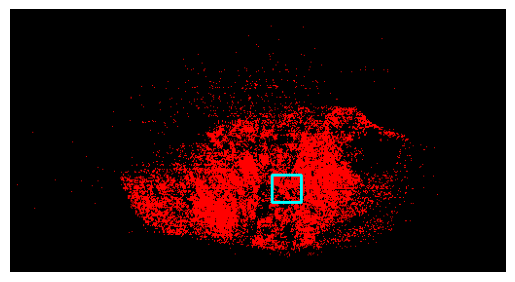

In [156]:
plt.imshow(sam_red_copy), plt.axis('off')
plt.savefig(f"C:/Users/htic/Desktop/StO2_images/SAM/14/{name}_SAM_Red.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('Precentage:', 50.34277648956548)

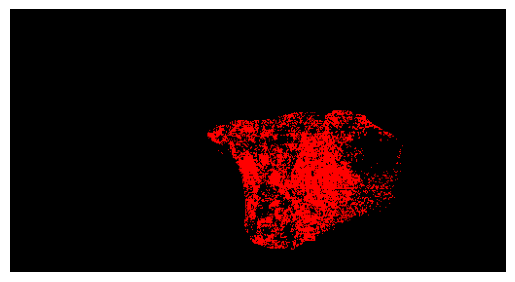

In [192]:
sam_masked_region_red = cv2.bitwise_and(sam_red, sam_red, mask=mask)
plt.imshow(sam_masked_region_red, cmap="gray"), plt.axis("off")
mask_count = (np.count_nonzero(mask))
sam_count = (np.count_nonzero(sam_masked_region_red))
perc = (sam_count/mask_count) * 100
plt.savefig(f"C:/Users/htic/Desktop/StO2_images/SAM/14/{name}_SAM_Red_ROI.png")
("Precentage:", perc)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


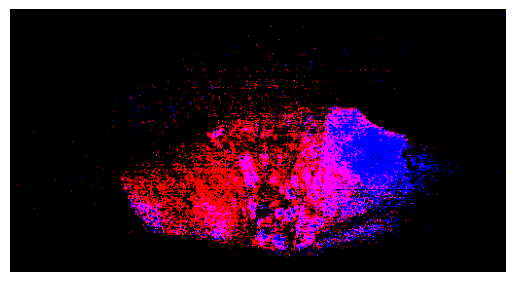

In [158]:
mix_sam = np.zeros((img.shape[0], img.shape[1], 3))
mix_sam[:,:,0] = sam_red[:,:,0]
mix_sam[:,:,1] = sam_red[:,:,1]
mix_sam[:,:,2] = sam_blue[:,:,2]

plt.imshow(mix_sam), plt.axis("off")
plt.savefig(f"C:/Users/htic/Desktop/StO2_images/SAM/14/{name}_Rb.png")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


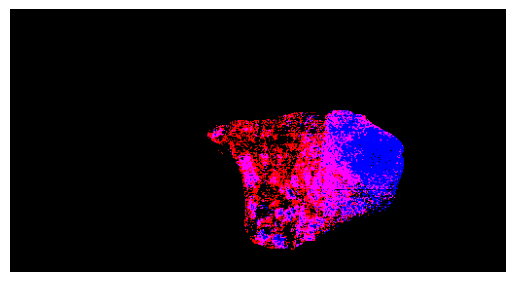

In [163]:
sam_final = cv2.bitwise_and(mix_sam, mix_sam, mask=mask)
plt.imshow(sam_final), plt.axis("off")
plt.savefig(f"C:/Users/htic/Desktop/StO2_images/SAM/14/{name}_Rbmask.png")


[  0 255]


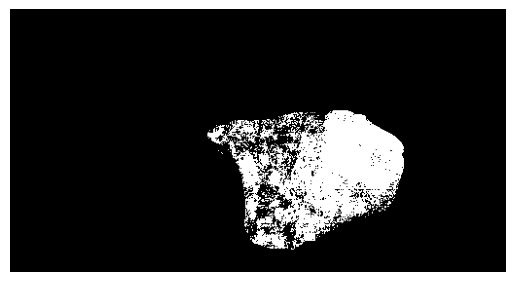

In [190]:
sam_final = sam_final.astype(np.uint8)
gray = cv2.cvtColor(sam_final, cv2.COLOR_BGR2GRAY)
ret, sam_binary = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY)
plt.imshow(sam_binary, cmap="gray"), plt.axis("off")
print(np.unique(sam_final))

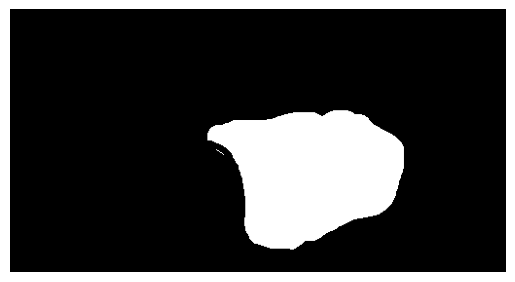

In [193]:
plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.savefig((f"C:/Users/htic/Desktop/StO2_images/SAM/14/{name}_Mask.png"))

In [191]:
mask_count = (np.count_nonzero(mask))
sam_count = (np.count_nonzero(sam_binary))
perc = (sam_count/mask_count) * 100
print(perc)


73.10212723056759


[80.36596431091844, 93.99881164587048, 91.83524694733005, 93.85992217898833, 76.84047095355156, 92.70900982811621, 96.94289445565713, 95.00800969822922, 62.532106803655694, 84.68257682108874, 100.90230870047382]


In [ ]:
plt.imshow(sam_rgb), plt.axis("off")
plt.savefig(f"C:/Users/htic/Desktop/{name}_SAM_Class.png")


In [ ]:
# find percentage of number of pixels that are not 0
sam_masked_region = sam_red_copy + sam_masked_region
sam_masked_region = cv2.bitwise_and(sam_rgb, sam_rgb, mask=mask)
plt.imshow(sam_masked_region, cmap="gray"), plt.axis("off")
mask_count = (np.count_nonzero(mask))
sam_count = (np.count_nonzero(sam_masked_region))
perc = (sam_count/mask_count) * 100
# plt.savefig(f"C:/Users/htic/Desktop/{name}_SAM_ROI.png")
("Precentage:", perc)

In [ ]:
plt.figure(figsize=(45, 15))
plt.subplot(1,2,1),plt.imshow(rgb_img), plt.axis("off")
plt.subplot(1,2,2),plt.imshow(colour_sam, cmap="gray"), plt.axis("off")
# plt.subplot(1,3,3),plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.savefig("C:/Users/htic/Documents/Jupyter/MSI_Oral_Analysis/SAM.png")

In [ ]:
oveerlaid = cv2.addedwegiht()

In [ ]:
sam_img = np.expand_dims(sam, axis=2)
sam_img = np.repeat(sam_img, 16, axis=2)
healthy_reg = sam_img[np.nonzero(img)]
healthy_reg = healthy_reg.reshape((270,510,16))
print(healthy_reg.shape)
plt.imshow(healthy_reg[:,:,7], cmap = "gray") 

In [ ]:
mean_healthy = np.mean(hea)

In [ ]:
def calculate_iou(mask_pred, mask_gt):
    mask_gt = np.expand_dims(mask_gt, axis=2)
    # mask_gt = np.repeat(mask_gt, 16, axis=2)
    print(mask_gt.shape)
    # Flatten the predicted and ground truth masks
    mask_pred_flat = mask_pred.flatten()
    mask_gt_flat = mask_gt.flatten()
    # Calculate the intersection and union
    intersection = np.logical_and(mask_pred_flat, mask_gt_flat)
    union = np.logical_or(mask_pred_flat, mask_gt_flat)
    print(np.sum(intersection), np.sum(union))
    # Calculate the IoU
    iou = np.sum(intersection) / np.sum(union)
    return iou

In [ ]:
plt.imshow(mask, cmap = 'gray')
plt.show()